Precision: 1e+01, pi: 4.0000000, Naive Time: 0.0000201 seconds, Vectorized Time: 0.0000186 seconds, JIT Time: 0.0000018 seconds
Precision: 1e+02, pi: 3.2800000, Naive Time: 0.0000525 seconds, Vectorized Time: 0.0000162 seconds, JIT Time: 0.0000039 seconds
Precision: 1e+03, pi: 3.2920000, Naive Time: 0.0004232 seconds, Vectorized Time: 0.0000316 seconds, JIT Time: 0.0000275 seconds
Precision: 1e+04, pi: 3.1496000, Naive Time: 0.0042002 seconds, Vectorized Time: 0.0001714 seconds, JIT Time: 0.0002383 seconds
Precision: 1e+05, pi: 3.1450400, Naive Time: 0.0433403 seconds, Vectorized Time: 0.0018299 seconds, JIT Time: 0.0024139 seconds
Precision: 1e+06, pi: 3.1381560, Naive Time: 0.6766127 seconds, Vectorized Time: 0.0307330 seconds, JIT Time: 0.0258667 seconds
Precision: 1e+07, pi: 3.1416200, Naive Time: 4.2678730 seconds, Vectorized Time: 0.2717862 seconds, JIT Time: 0.3586974 seconds


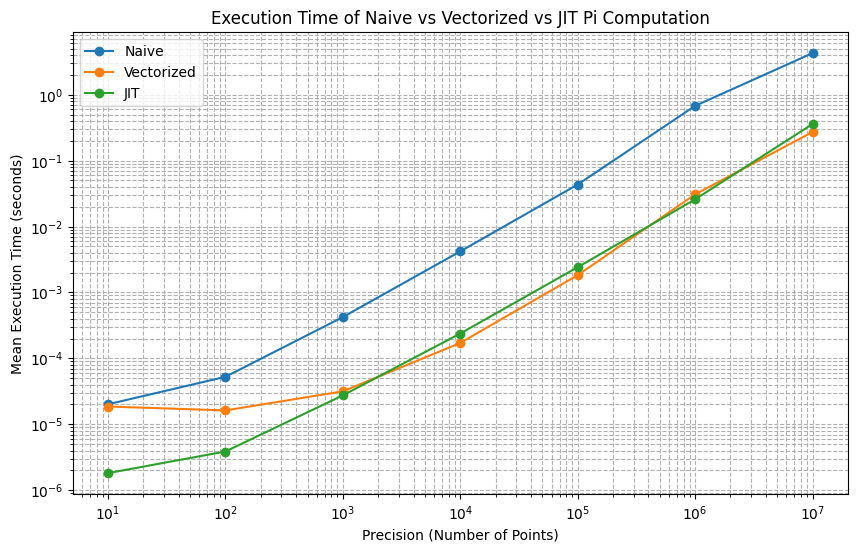

In [10]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
import numba

def compute_pi_naive(n):
    X = np.random.uniform(0, 1, n)
    Y = np.random.uniform(0, 1, n)
    inside_circle = 0
    for i in range(n):
        if X[i]**2 + Y[i]**2 <= 1:
            inside_circle += 1
    return (inside_circle / n) * 4

def compute_pi_vectorized(n):
    X = np.random.uniform(0, 1, n)
    Y = np.random.uniform(0, 1, n)
    inside_circle = (X**2 + Y**2) <= 1
    return (inside_circle.sum() / n) * 4

@numba.jit(nopython=True)
def compute_pi_jit(n):
    X = np.random.uniform(0, 1, n)
    Y = np.random.uniform(0, 1, n)
    inside_circle = 0
    for i in range(n):
        if X[i]**2 + Y[i]**2 <= 1:
            inside_circle += 1
    return (inside_circle / n) * 4

precisions = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]
REPEATS = 5

results = []

# Warm-up runs
compute_pi_naive(int(1e3))
compute_pi_vectorized(int(1e3))
compute_pi_jit(int(1e3))

for p in precisions:
    naive_time = timeit.repeat(lambda: compute_pi_naive(int(p)), number=1, repeat=REPEATS)
    vectorized_time = timeit.repeat(lambda: compute_pi_vectorized(int(p)), number=1, repeat=REPEATS)
    jit_time = timeit.repeat(lambda: compute_pi_jit(int(p)), number=1, repeat=REPEATS)
    mean_naive_time = np.mean(naive_time)
    mean_vectorized_time = np.mean(vectorized_time)
    mean_jit_time = np.mean(jit_time)
    pi_estimate = compute_pi_vectorized(int(p))
    results.append((p, mean_naive_time, mean_vectorized_time, mean_jit_time, pi_estimate))
    print(f"Precision: {p:.0e}, pi: {pi_estimate:.7f}, Naive Time: {mean_naive_time:.7f} seconds, Vectorized Time: {mean_vectorized_time:.7f} seconds, JIT Time: {mean_jit_time:.7f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(precisions, [r[1] for r in results], label='Naive', marker='o')
plt.plot(precisions, [r[2] for r in results], label='Vectorized', marker='o')
plt.plot(precisions, [r[3] for r in results], label='JIT', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Precision (Number of Points)')
plt.ylabel('Mean Execution Time (seconds)')
plt.title('Execution Time of Naive vs Vectorized vs JIT Pi Computation')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()
